In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np
import matplotlib.pyplot as matplt

from rmtpy.ensemble import GOE

In [3]:
def _build_m_labels(M):
    labels = []
    for m in M:
        labels.append("m = "+str(m))
    return labels

In [4]:
def print_variations(times_naive, times_tridiag):
    print("\t Naive computation:")
    for i in range(1, len(times_naive)):
        print(times_naive[i-1], '->', times_naive[i], ':', times_naive[i]-times_naive[i-1])
    
    print("\t Tridiagonal computation:")
    for i in range(1, len(times_tridiag)):
        print(times_tridiag[i-1], '->', times_tridiag[i], ':', times_tridiag[i]-times_tridiag[i-1])

In [11]:
time.sleep(60)
print("Ready")

Ready


# 1 bin simulation

	 Naive computation:
[5.75032234] -> [28.67301702] : [22.92269468]
[28.67301702] -> [108.15674067] : [79.48372364]
[108.15674067] -> [279.97180223] : [171.81506157]
[279.97180223] -> [520.96973658] : [240.99793434]
[520.96973658] -> [941.02290869] : [420.05317211]
[941.02290869] -> [1505.86351156] : [564.84060287]
[1505.86351156] -> [2225.31673908] : [719.45322752]
[2225.31673908] -> [3202.17554569] : [976.85880661]
[3202.17554569] -> [4445.07205486] : [1242.89650917]
[4445.07205486] -> [6027.2687912] : [1582.19673634]
[6027.2687912] -> [7873.65256548] : [1846.38377428]
[7873.65256548] -> [11179.4701457] : [3305.81758022]
[11179.4701457] -> [30504.41857576] : [19324.94843006]
[30504.41857576] -> [35803.45349312] : [5299.03491735]
[35803.45349312] -> [41868.37674379] : [6064.92325068]
[41868.37674379] -> [48107.00927973] : [6238.63253593]
	 Tridiagonal computation:
[0.89828968] -> [1.29375458] : [0.3954649]
[1.29375458] -> [2.18223333] : [0.88847876]
[2.18223333] -> [3.81513834] : [1.63

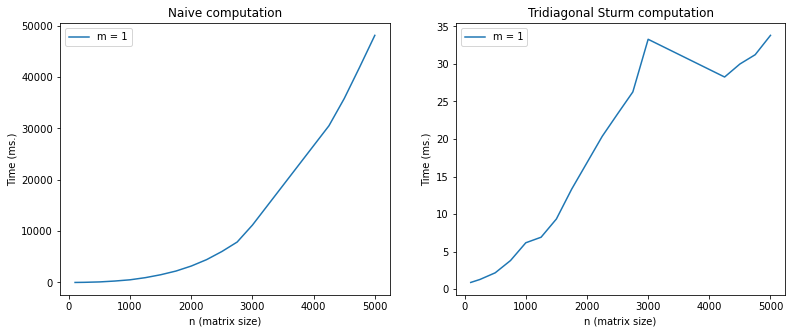

In [14]:
interval = (-2,2)
to_norm = False

N = [100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 4250, 4500, 4750, 5000]
M = [1]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

nreps = 20

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            goe1 = GOE(n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe1.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            goe2 = GOE(n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe2.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)

lines = axes[0].plot(N, times_naive)
axes[0].legend(lines, labels)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

lines = axes[1].plot(N, times_tridiag)
axes[1].legend(lines, labels)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

print_variations(times_naive, times_tridiag)


# Tridiag hist vs Standard hist

	 Naive computation:
[12.20683098 11.62838936 11.79141045 11.74423218 12.68346786 13.42885017
 11.47176743 11.6532135 ] -> [50.09255409 47.86374092 47.39397049 47.5091362  47.43702888 47.39170074
 47.89043427 47.77360916] : [37.88572311 36.23535156 35.60256004 35.76490402 34.75356102 33.96285057
 36.41866684 36.12039566]
[50.09255409 47.86374092 47.39397049 47.5091362  47.43702888 47.39170074
 47.89043427 47.77360916] -> [139.04385567 138.88939857 150.01717567 142.08180428 140.79071045
 143.56939316 144.17842865 144.73134995] : [ 88.95130157  91.02565765 102.62320518  94.57266808  93.35368156
  96.17769241  96.28799438  96.95774078]
[139.04385567 138.88939857 150.01717567 142.08180428 140.79071045
 143.56939316 144.17842865 144.73134995] -> [259.3291378  258.36461067 254.92229462 264.17038918 254.8124218
 256.09546661 256.08972549 254.55615997] : [120.28528214 119.4752121  104.90511894 122.0885849  114.02171135
 112.52607346 111.91129684 109.82481003]
[259.3291378  258.36461067 254.922

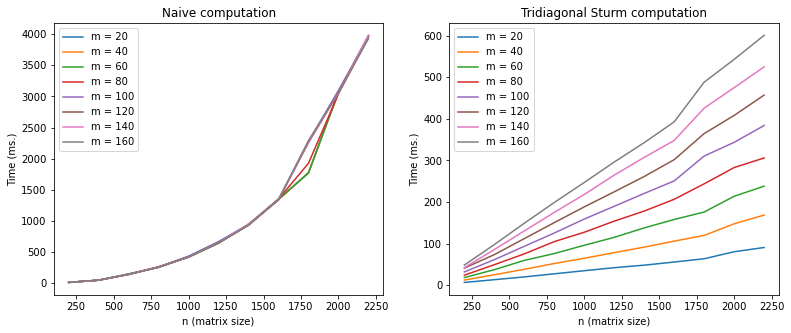

In [16]:
interval = (-2,2)
to_norm = False

N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

interval = (-2, 2)

nreps = 1

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            goe1 = GOE(n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe1.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            goe2 = GOE(n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe2.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)

lines = axes[0].plot(N, times_naive)
axes[0].legend(lines, labels)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

lines = axes[1].plot(N, times_tridiag)
axes[1].legend(lines, labels)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

print_variations(times_naive, times_tridiag)

	 Naive computation:
[14.56995964 11.8042469  14.09497261 12.93009758 12.99902916 12.60018349
 11.62768364 11.9272995  11.70741081 11.4358902 ] -> [48.02390099 55.94343185 47.83277512 47.47723579 47.40252495 47.74424553
 47.83287048 47.96521187 47.69251823 48.13903809] : [33.45394135 44.13918495 33.73780251 34.54713821 34.40349579 35.14406204
 36.20518684 36.03791237 35.98510742 36.70314789]
[48.02390099 55.94343185 47.83277512 47.47723579 47.40252495 47.74424553
 47.83287048 47.96521187 47.69251823 48.13903809] -> [140.98818779 140.36269188 142.28560448 143.04052353 142.6811409
 151.90071106 145.77272415 146.65089607 145.90102196 145.73216438] : [ 92.9642868   84.41926003  94.45282936  95.56328773  95.27861595
 104.15646553  97.93985367  98.6856842   98.20850372  97.5931263 ]
[140.98818779 140.36269188 142.28560448 143.04052353 142.6811409
 151.90071106 145.77272415 146.65089607 145.90102196 145.73216438] -> [259.00356293 258.26006889 261.25397682 269.62503433 257.1303463
 258.5674762

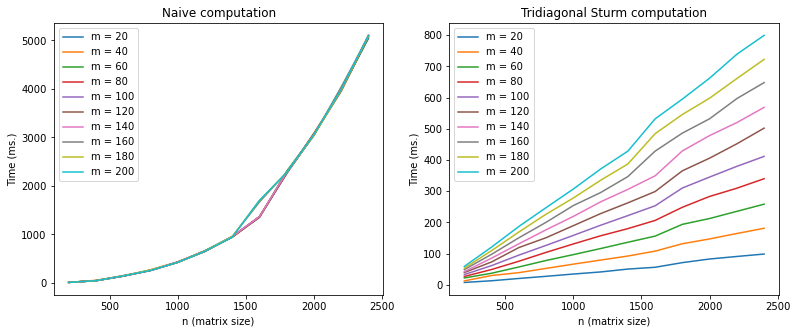

In [17]:
interval = (-2,2)
to_norm = False

N = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
M = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

times_naive = np.zeros((len(N), len(M)))
times_tridiag = np.zeros((len(N), len(M)))

interval = (-2, 2)

nreps = 25

for (i, n) in enumerate(N):
    for (j, m) in enumerate(M):
        for k in range(nreps):
            goe1 = GOE(n=n, use_tridiagonal=False)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe1.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_naive[i][j] += (t2 - t1)*1000 # ms

            goe2 = GOE(n=n, use_tridiagonal=True)
            t1 = time.time()
            eig_hist_nt, bins_nt = goe2.eigval_hist(bins=m, interval=interval, normed_hist=to_norm)
            t2 = time.time()
            times_tridiag[i][j] += (t2 - t1)*1000 # ms
    
        times_naive[i][j] /= nreps
        times_tridiag[i][j] /= nreps

fig, axes = matplt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(13)
fig.subplots_adjust(hspace=.5)

labels = _build_m_labels(M)

lines = axes[0].plot(N, times_naive)
axes[0].legend(lines, labels)
axes[0].set_title('Naive computation')
axes[0].set_xlabel('n (matrix size)')
axes[0].set_ylabel('Time (ms.)')

lines = axes[1].plot(N, times_tridiag)
axes[1].legend(lines, labels)
axes[1].set_title('Tridiagonal Sturm computation')
axes[1].set_xlabel('n (matrix size)')
_ = axes[1].set_ylabel('Time (ms.)')

print_variations(times_naive, times_tridiag)